## <center>EURO-USD Exchange Rates During George Bush, Barack Obama, and Donald Trump

This notebook demonstrates a data visualization of Euro-USD exchange rates. I explore a dataset that describes daily exchange rates for the euro between 1999 and 2021. The dataset was prepared by Daria Chemkaeva using European Central Bank as a source and posted at [Kaggle.com](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). I focus on Euro-USD exchange rates during the presidency of three US presidents.

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
warnings.filterwarnings('ignore')
exchange_rates = pd.read_csv('euro-daily-hist_1999_2021.csv')
exchange_rates.sample(5)

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
3023,2009-12-11,5.61000,1.6076,1.9558,2.5846,1.5481,1.5125,10.0755,NaN,25.727,...,44.3730,10.4490,2.0495,NaN,NaN,48.8680,2.2058,47.575,1.4757,11.0255
3238,2009-02-13,4.48000,1.9404,1.9558,2.9137,1.5833,1.4931,8.7626,NaN,28.560,...,44.4395,10.7455,1.9334,NaN,NaN,44.9770,2.1130,43.645,1.2823,12.7845
4665,2003-08-27,3.20120,1.7039,1.9462,3.2383,1.5269,1.5372,9.0277,0.58445,32.570,...,33.1912,9.2670,1.9109,235.0100,41.990,44.9326,1.5310,37.291,1.0907,8.0368
2836,2010-08-31,5.00730,1.4304,1.9558,2.2347,1.3489,1.2935,8.6318,NaN,24.850,...,39.1038,9.3890,1.7193,NaN,NaN,39.6700,1.9373,40.695,1.2680,9.4044
2088,2013-07-22,7.19130,1.4272,1.9558,2.9497,1.3618,1.2370,8.0856,NaN,25.976,...,42.5430,8.5577,1.6618,NaN,NaN,40.7620,2.5244,39.342,1.3166,12.9458


In [2]:
#Data clearning
exchange_rates.rename(columns={'[US dollar ]': 'USD', 'Period\\Unit:': 'Time'}, inplace=True) #Rename column names for easing typing
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']) # changing Time column to datetime type
exchange_rates.sort_values('Time', inplace=True) 
exchange_rates.reset_index(drop=True, inplace=True) # reseting the index

dollar = exchange_rates[['USD', 'Time']].copy() #isolating Time & USD columns
dollar = dollar.loc[dollar['USD'] != '-'] #dropping all rows with '-'
dollar['USD'] = dollar['USD'].astype('float')
dollar['rolling_mean'] = dollar['USD'].rolling(30).mean()

In [3]:
#Slicing dataset by period of presedency
bush = dollar.copy()[(dollar['Time'].dt.year >= 2001) & (dollar['Time'].dt.year < 2009)]
obama = dollar.copy()[(dollar['Time'].dt.year >= 2009) & (dollar['Time'].dt.year < 2017)]
trump = dollar.copy()[(dollar['Time'].dt.year >= 2017)& (dollar['Time'].dt.year < 2021)]

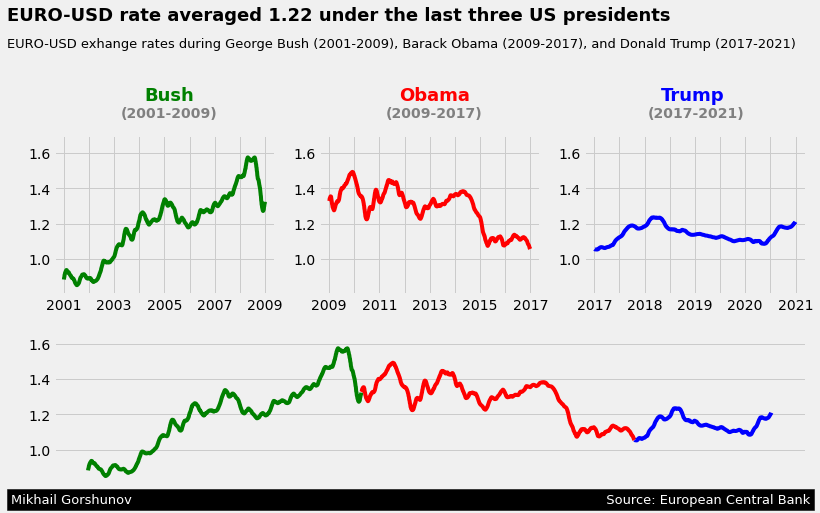

In [4]:
# Adding plots
style.use('fivethirtyeight')

plt.figure(figsize=(12,6))
ax1=plt.subplot(2,3,1)
ax2=plt.subplot(2,3,2)
ax3=plt.subplot(2,3,3)
ax4=plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_ylim(bottom=0.8, top=1.7) #setting y-limits
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    
# Bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='green')
ax1.set_xticklabels(['', '2001','', '2003','', '2005','', '2007','', '2009'])
ax1.text(12500, 1.9, 'Bush', fontsize=18, weight='bold', color='green')
ax1.text(12150, 1.8, '(2001-2009)', weight='bold', color='gray')
    
# Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='red')
ax2.set_xticklabels(['', '2009','', '2011','', '2013','', '2015','', '2017'])
ax1.text(16200, 1.9, 'Obama', fontsize=18, weight='bold', color='red')
ax1.text(16000, 1.8, '(2009-2017)', weight='bold', color='gray')

# Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='blue')
ax3.set_xticklabels(['2017','', '2018','', '2019','', '2020','','2021'])
ax1.text(20000, 1.9, 'Trump', fontsize=18, weight='bold', color='blue')
ax1.text(19800, 1.8, '(2017-2021)', weight='bold', color='gray')

# Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'], color='green')
ax4.plot(obama['Time'], obama['rolling_mean'], color='red')
ax4.plot(trump['Time'], trump['rolling_mean'], color='blue')
ax4.set_xticks([])

#Title
ax1.text(10500, 2.2, 'EURO-USD exhange rates during George Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021) ', fontsize=13)
ax1.text(10500, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',fontsize=18, weight='bold')

#Adding signature
ax4.text(10500, 0.7, 'Mikhail Gorshunov' + ' '*115 + 'Source: European Central Bank', color='white', backgroundcolor='black', size=13)

plt.show()